R / GGPLOT / POWERPOINT

# Making an entire slide with one plot

![The finished plot](/work/powerpoint_fig_01.png)

> While it might seem convenient to rely on Adobe Illustrator for the finishing touches on a plot and then assemble the export into PowerPoint with additional graphics, annotations, titles, and explanations, the result can be a folder full of files and a complicated update process whenever the underlying data changes. This tutorial explores how a plot might incorporate some of that polish itself, making for slide decks that are easier to build, update, and maintain. 

### Tasks to accomplish

- Customizing a plot in R. 

- Employing rich text and fonts.

- Integrating external graphics.

- Layout of multiple components.

- Generating a final plot of sufficient resolution.

# Building a chart plot

&nbsp;
&nbsp;

***NOTE:** Deepnote does not yet support interactivity in a published R notebook. Either click "View Source" (if available at the top-right of this webpage) or clone the [the companion R.script](https://github.com/ptrdo/hello-ggplot/blob/main/layout/powerpoint.R).*

&nbsp;
&nbsp;

### Basic setup for ggplot

The focus of this tutorial will be the layout and assembly of various items into a single plot, so the data is unimportant. The popular plotting library, ggplot2, will be installed and simple data.frame is created to chart a sine wave. Feel free to run the following cell and tinker with any of the code to see what happens. For example, try alternative themes as suggested in the commenting. Don't worry, the next steps will each start fresh, so tinker away!

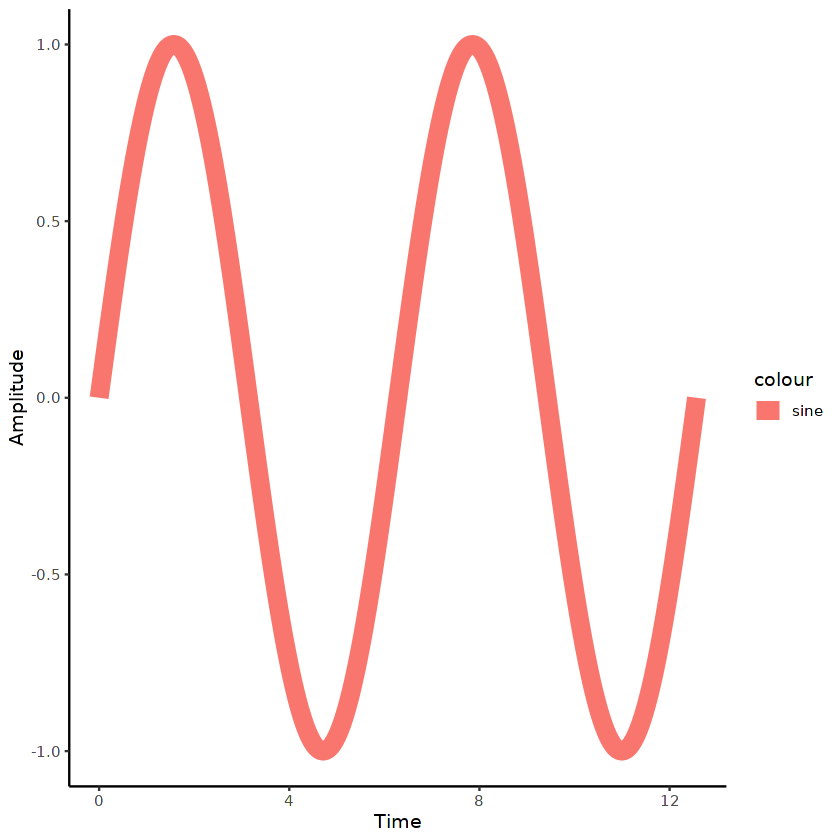

In [ ]:
library(ggplot2)

# create some simple data
cycles.interval <- pi/64
cycles <- seq(0, 4*pi, cycles.interval)
waves <- data.frame(Time=cycles, Amplitude=sin(cycles))

# choose an underlying theme
theme_set(theme_classic())

ggplot(waves, aes(Time, Amplitude, colour='sine')) +
    geom_path(size=3)


### Plotting to an aspect ratio

By default, ggplot will fill the available area appropriate to the data and type of chart (geom). Also by default, the available area can be constrained by certain aspects of the chart, such as axes, labels, legend, and title. If the chart is expected to share the real estate of a PowerPoint slide, it can be beneficial to establish ground rules for how it should share that space. An aspect ratio is a good start.

The following code adds a fixed scale coordinate system to the plot via coord_fixed(). The breadth of what's being charted on each axis is calculated and then conformed to fit within a specified aspect ratio. 16/9 is the default aspect ratio of PowerPoint slides. Alternatively, 4/3 is common to old-fashioned cathode-ray television screens. 

To do: Note that plot.background has been given a color to illustrate its boundary. What else is different here than the previous plot? For example, the legend is gone. How was that done? Are there others ways to accomplish this? 

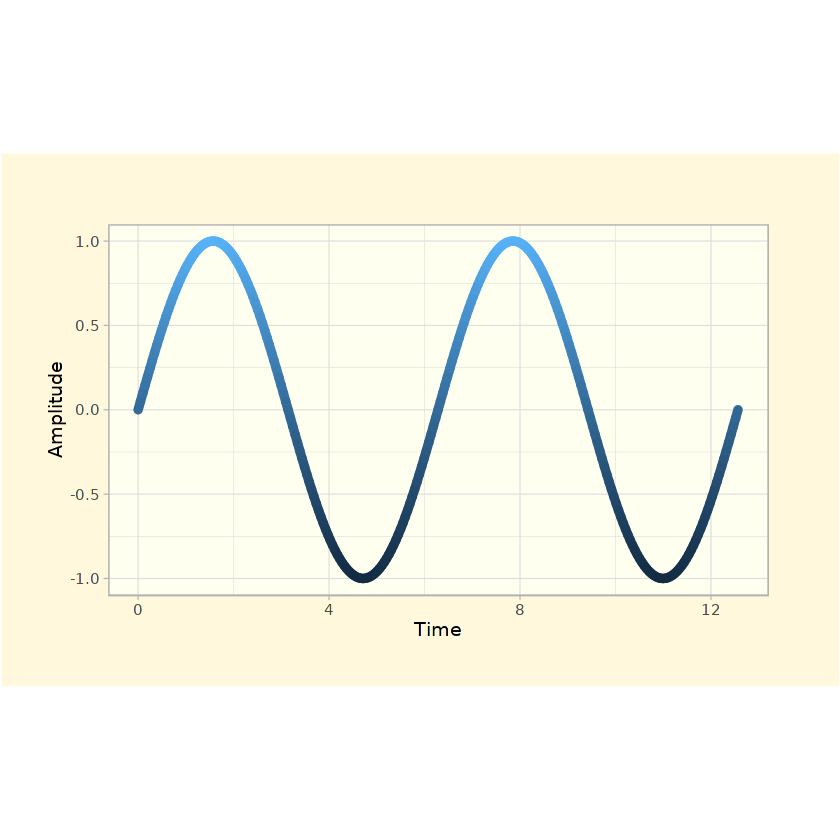

In [ ]:
library(ggplot2)

# create some simple data
cycles.interval <- pi/64
cycles <- seq(0, 4*pi, cycles.interval)
waves <- data.frame(Time=cycles, Amplitude=sin(cycles))

# chose an underlying theme
theme_set(theme_light())

# set an aspect ratio
ratio.aspect <- 16/9
ratio.breadth <- (max(waves$Time)-min(waves$Time))/(max(waves$Amplitude)-min(waves$Amplitude))

ggplot(waves, aes(Time, Amplitude, colour=Amplitude)) +
    coord_fixed(ratio.breadth / ratio.aspect) +
    geom_path(size=2,lineend='round') +
    theme(
        plot.margin=margin(3,3,2,2,'lines'),
        plot.background=element_rect(fill='cornsilk'),
        panel.background=element_rect(fill='ivory'),
        legend.position='NONE'
    )

### Customizing the labeling

A PowerPoint presentation is usually viewed from across a room while the presenter is busy trying to gain attention and talk about the big picture. Therefore, it might not be necessary to show a chart with exquisite detail that could serve as a distraction, is barely visible, and is being explained anyway. Anything that isn't helping the chart could be removed for the extra space, and the extra room could definitely be used for well-placed words that will assist the presentation. 

The following code plots the same chart as before but with the addition of an annotate() and geom_segment() to describe a pretend threshold of "feels like Spring."  Comments in the ggplot show where another annotation and segment belong for when it "feels like Winter." Add those. 

To do: Neither axis title is needed for the end result. Also not needed is the y-axis labels, the tick marks,  or grid lines. Each of these could be removed individually, but is there a way they could all be removed at once? (see Hint 1). What's left to remove? How can those be removed too? (see Hint 2). One thing needed are the x-axis labels (see Hint 3). Note how putting one thing back is a lot easier than taking everything else away. 

undefined. Hint: theme_set(theme_void())

undefined. Hint: (fill='ivory',color='transparent') This fix is needed for plot.background too!

undefined. Hint: axis.text=element_text(color='black')

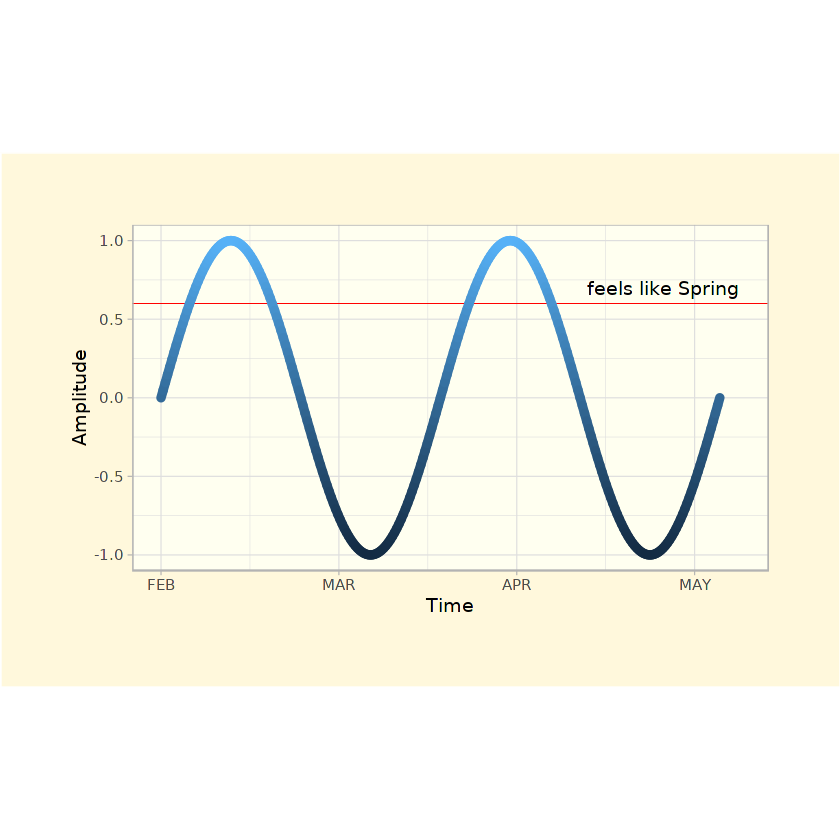

In [ ]:
library(ggplot2)

# create some simple data
cycles.interval <- pi/64
cycles <- seq(0, 4*pi, cycles.interval)
waves <- data.frame(Time=cycles, Amplitude=sin(cycles))

# chose an underlying theme
theme_set(theme_light()) 

# set an aspect ratio
ratio.aspect <- 16/9
ratio.breadth <- (max(waves$Time)-min(waves$Time))/(max(waves$Amplitude)-min(waves$Amplitude))

ggplot(waves, aes(Time, Amplitude, colour=Amplitude)) +
    coord_fixed(ratio.breadth / ratio.aspect) +
    geom_segment(x=-2, xend=14, y=.6, yend=.6, size=0.1, color='red') +
    # add another geom_segment here at y=-.6
    geom_path(size=2,lineend='round') +
    annotate('text', label='feels like Spring', x=13, y=.7, hjust=1, color='black') +
    # add another annotate here at x=-.3, y=-.7 saying 'feels like Winter' 
    scale_x_continuous(breaks=c(0,4,8,12),labels=c('FEB','MAR','APR','MAY')) +
    theme(
        plot.margin=margin(3,3,3,3,'lines'),
        plot.background=element_rect(fill='cornsilk'),
        panel.background=element_rect(fill='ivory'),
        legend.position='NONE'
    )

### Employing special fonts

By default, ggplot will use a standard sans-serif font. The precise characteristics of this font might vary slightly given the device and environment where the plot is being rendered, but are generic enough to assure predictable results. However, when preparing graphics for a PowerPoint presentation, more sophistication can be required to enhance the legibility of the text and coordinate its style with the slide template and brand guidelines. 

Fortunately, a library named showtext is available to load fonts from a vast collection available via Google Fonts. This provides for loading fonts from the local system or via font_add_google. Note that when this font management system is enforced with  showtext_auto() the appearance all fonts will be affected, even those not styled with a particular font. Note, for instance, what happens to the annotations (which are purposely independent from general styling). 

- To Do: Try other fonts available at Google Fonts. How might a particular weight of font (e/g "Thin" or "Black") be imported as the default? The next step shows how. 

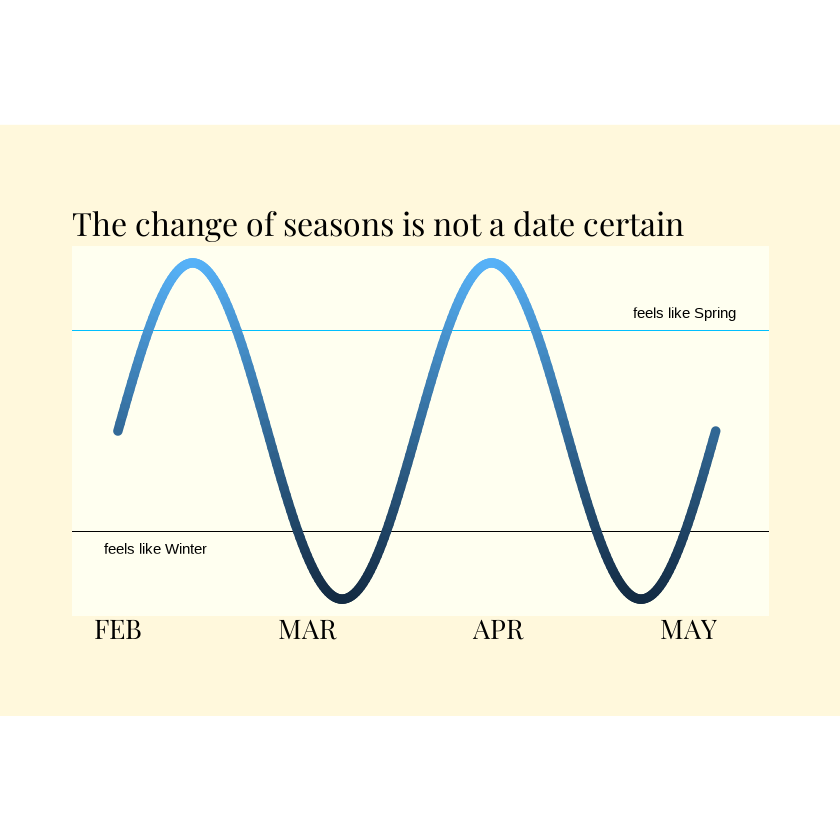

In [2]:
# install.packages('showtext')

library(showtext)
library(ggplot2)

# create some simple data
cycles.interval <- pi/64
cycles <- seq(0, 4*pi, cycles.interval)
waves <- data.frame(Time=cycles, Amplitude=sin(cycles))

# load the special font
font_add_google(name='Playfair Display', family='playfair') 

# chose an underlying theme PLUS special font
theme_set(theme_void(base_family='playfair', base_size=20))

# give font rendering to showtext
showtext_auto(T)

# set an aspect ratio
ratio.aspect <- 16/9
ratio.breadth <- (max(waves$Time)-min(waves$Time))/(max(waves$Amplitude)-min(waves$Amplitude))

ggplot(waves, aes(Time, Amplitude, colour=Amplitude)) +
    coord_fixed(ratio.breadth / ratio.aspect) +
    ggtitle('The change of seasons is not a date certain') +
    geom_segment(x=-2, xend=14, y=.6, yend=.6, size=0.1, color='deepskyblue') +
    geom_segment(x=-2, xend=14, y=-.6, yend=-.6, size=0.1, color='black') +
    geom_path(size=2,lineend='round') +
    annotate('text', label='feels like Spring', x=13, y=.7, hjust=1, color='black') +
    annotate('text', label='feels like Winter', x=-.3, y=-.7, hjust=0, color='black') +
    scale_x_continuous(breaks=c(0,4,8,12),labels=c('FEB','MAR','APR','MAY')) +
    theme(
        plot.margin=margin(3,3,3,3,'lines'),
        plot.background=element_rect(fill='cornsilk', color='transparent'),
        panel.background=element_rect(fill='ivory', color='transparent'),
        legend.position='NONE',
        axis.text.x=element_text(color='black')
    )

# return font rendering to normal
showtext_auto(F)

### Preparing the chart for assembly

In a few steps, this chart will be combined with a plotted text block and yet another plot containing a copyright clause and logo. Therefore, any extraneous padding and margins should be removed here so the eventual assembly can add or manage that where it matters most. The following code removes the chart's ggtitle (which will become the assembly title), and eliminates the plot.margin around the chart. For now, the plot.background coloring will remain to assist in visualizing how the individual components abut each other. 

- To Do: Note the differences here from the previous code block. For instance, there are now two fonts being loaded, and one has been designated to be a certain weight, regular.wt=200. Note also how the ggplot is being stored to a variable, chartplot which will next become one of the components of the final assembly.

In [5]:
# install.packages('showtext')

library(showtext)
library(ggplot2)

# create some simple data
cycles.interval <- pi/8
cycles <- seq(0,4*pi,cycles.interval)
waves <- data.frame(Time=cycles, Amplitude=sin(cycles))

# interpolate values with splines
cycles.interval.new <- pi/64
cycles.interpolate <- seq(0, 4*pi, cycles.interval.new)
weight <- splinefun(waves)
waves.spline <- data.frame(Time=cycles.interpolate, Amplitude=weight(cycles.interpolate))

# load the special font
font_add_google(name='Playfair Display', family='playfair') 
font_add_google(name='IBM Plex Sans', family='plexsans',regular.wt=200)

# chose an underlying theme PLUS special font
theme_set(theme_void(base_family='playfair', base_size=16))

# give font rendering to showtext
showtext_auto(T)

# set an aspect ratio
ratio.aspect <- 16/9
ratio.breadth <- (max(waves$Time)-min(waves$Time))/(max(waves$Amplitude)-min(waves$Amplitude))

# plot the data
chartplot <- ggplot(waves.spline, aes(Time, Amplitude, size=Amplitude, colour=Amplitude)) + 
    coord_fixed(ratio.breadth / ratio.aspect) +
    # ggtitle('The change of seasons is not a date certain') +
    geom_segment(x=-2, xend=14, y=.6, yend=.6, size=0.2, color='steelblue', linetype=3) +
    geom_segment(x=-2, xend=14, y=-.6, yend=-.6, size=0.2, color='steelblue', linetype=3) +
    geom_path(lineend='round') +
    annotate('text',label='feels like Spring',x=13,y=.7,hjust=1,color='steelblue',family='plexsans',size=6) +
    annotate('text',label='feels like Winter',x=-.5,y=-.7,hjust=0,color='steelblue',family='plexsans',size=6) +
    scale_x_continuous(breaks=c(0,4,8,12),labels=c('FEB','MAR','APR','MAY')) +
    scale_y_discrete(expand=c(.1,-.05)) +
    theme(
        plot.background=element_rect(fill='cornsilk', color='grey'),
        axis.text.x=element_text(color='black'),
        legend.position='NONE'
    )

# view the plot
# chartplot

# return font rendering to normal
showtext_auto(F)

    

![The chart is ready for assembly](/work/powerpoint_fig_02.png)

# Building a rich text plot

### Basic setup for ggtext

A block of text can be charted just as data can. Annotations work too, but when assembling various plots to a single layout, an independent block of text might afford more freedom for positioning. This methodology can also facilitate having a lot of text as an external resource that can be easily edited elsewhere and then imported when plotted. 

The ggtext library provides many features for implementing text within a plot, including support for Markdown formatting. Some syntax is yet to be supported, but relatively simple blocks of text should be possible. In the example below, a vector of strings help to format multiple lines of text, then a paste assembles them with a <br> separator. More convenient results might be possible by importing an external document formatted in Markdown. 

- To Do: As done with the chart in earlier steps, this plot will become one component of an assembly, so the axis labels and titles should be removed. Recall that a theme_set may be easier for this than styling each individual element. It will also be handy to stylize the plot.background element so that the boundary of this component can assist the final layout. 

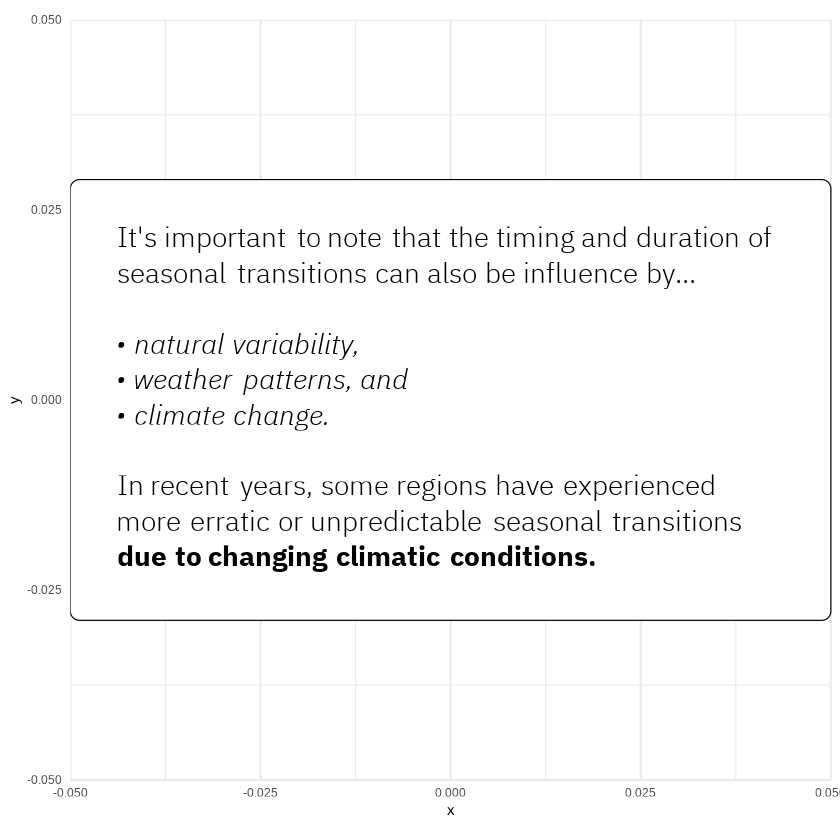

In [ ]:
# install.packages('showtext')
# install.packages('ggtext')

library(showtext)
library(ggtext)
library(ggplot2)

# load the special font
font_add_google(name='IBM Plex Sans', family='plexsans',regular.wt=300) 

# chose an underlying theme PLUS special font
theme_set(theme_minimal())

# give font rendering to showtext
showtext_auto(T)

# write some text
richtext <- c(
    'It\'s important to note that the timing and duration of seasonal transitions can also be influence by...',
    '*',
    '• natural variability,',
    '• weather patterns, and',
    '• climate change.',
    '*',
    'In recent years, some regions have experienced more erratic or unpredictable seasonal transitions **due to changing climatic conditions.**'
) 

markdown <- paste0(richtext, collapse='<br>')

textplot <- ggplot() +
  coord_fixed(1) +
  geom_textbox(
    aes(x=0, y=0, label=markdown), 
    width=1,
    color='black', 
    size=unit(7.5,'pt'), 
    family='plexsans',
    lineheight=unit(1,'lines'),
    box.padding=unit(2,'lines')
  )
  
# view the plot
textplot

# return font rendering to normal
showtext_auto(F)

### Preparing the text for assembly

The code block below is what's required to plot the text that will be assembled with the chartplot from previous steps. The plot.background has been colored with a fill and border to help assist with aligning the assembly components. The richtext Markdown has been simplified for simplicity sake. 

As this textplot is combined with the chartplot and the layout is finalized, it may be necessary to return to this plot and fine tune parameters such as the font size and lineheight (also known as leading). In this regard, it can be helpful to use values that are most-often associated with fonts, such as pt (points) for size and lines for lineheight. 

- To Do: In anticipation of fine tuning the text block, practice various adjustments to the font parameters. 

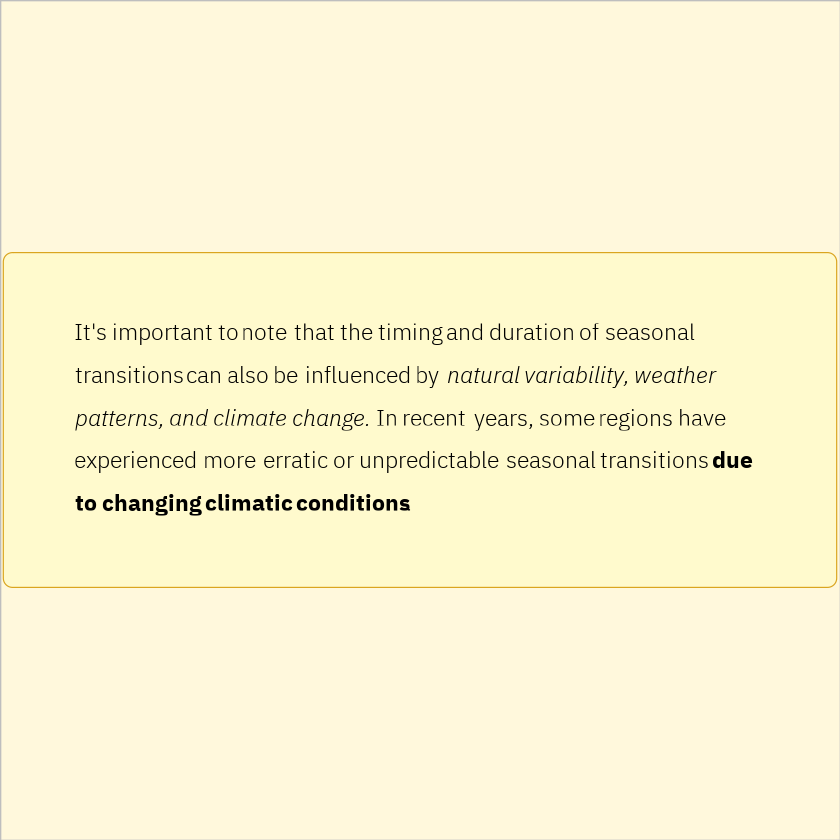

In [3]:
# install.packages('showtext')
# install.packages('ggtext')

library(showtext)
library(ggtext)
library(ggplot2)

# load the special font
font_add_google(name='IBM Plex Sans', family='plexsans',regular.wt=300) 

# chose an underlying theme PLUS special font
theme_set(theme_void())

# give font rendering to showtext
showtext_auto(T)

# write some text
richtext <- 'It\'s important to note that the timing and duration of seasonal transitions can also be influenced by *natural variability, weather patterns, and climate change.* In recent years, some regions have experienced more erratic or unpredictable seasonal transitions **due to changing climatic conditions**.'

textplot <- ggplot() +
  coord_fixed(1) +
  geom_textbox(
    aes(x=0, y=0, label=richtext, box.colour='goldenrod'), 
    fill='lemonchiffon',
    width=1,
    color='black', 
    size=unit(6,'pt'), 
    family='plexsans',
    lineheight=unit(1.5,'lines'),
    box.padding=unit(3,'lines'),
    box.margin=unit(2,'pt')
  ) +
  theme(
    plot.background=element_rect(fill='cornsilk', color='grey')
  )
  
# view the plot
textplot

# return font rendering to normal
showtext_auto(F)

# Building the slide layout

### Basic setup for Patchwork assembly

&nbsp;
&nbsp;

***NOTE:** The following few steps assume that previous code blocks have been run to create the plots stored in the variables named `chartplot` and `textplot`. The following code blocks will not run without these objects.*

&nbsp;
&nbsp;

The library Patchwork uses the syntax of simple mathematic expressions to combine any number of plots into a single assembly. For example, chartplot + textplot will result in the two plots appearing side-by-side. 

At this point, it should be noted that the environment where R is running will contribute certain factors that impact the plotted result, primarily the ambient resolution(s) that figure into the calculated size of things. So, when the relative size of things becomes consequential—such as when combining multiple plots for a PowerPoint slide—it makes sense to use ggsave or dev (devices) to minimize the variability introduced by the environment. 

It should also be noted that patchwork is not yet fully supported in the Deepnote environment, so the output file, combo.png will likely not render as expected (especially the fonts). These final few steps are best run within RStudio (from where the image shown after this code block was generated). 

In [11]:
# NOTE: THIS BLOCK REQUIRES THE CODE ABOVE TO BE RUN

# install.packages('showtext')
# install.packages('ggtext')
# install.packages('patchwork')

library(showtext)
library(ggtext)
library(patchwork)
library(ggplot2)

heading <- 'The change of seasons is not date certain'
copyright <- '&copy; 2023 Bill & Melinda Gates Foundation. All rights reserved.'

# load the special fonts
font_add_google(name='Playfair Display', family='playfair') 
font_add_google(name='IBM Plex Sans', family='plexsans',regular.wt=200)

# give font rendering to showtext
showtext_auto(T)

combo <- chartplot + textplot 

ggsave(
  filename = 'combo.png', 
  path = '/work/',
  plot = combo,
  device = png, 
  bg = 'white',
  units = c('in'),
  width = 16,
  height = 9, 
  scale = 1, # +/- dimension
  dpi = 180 # +/- resolution
)

# view the plot
# combo

# return font rendering to normal
showtext_auto(F)


![The chart + text assembly](/work/powerpoint_fig_03.png)

# Final details

### Placing an SVG logo

A Scalable Vector Graphic SVG is an XML markup language that describes graphics with points and paths, affording them the ability to render in high quality at virtually any resolution. However, the SVG format is not natively supported in R, so an intermediary technology cairo is employed to transfer the graphic from its source to a format that can be plotted. This code describes the methodology of importing an SVG from and URL and then converting it to a local file to plot. 

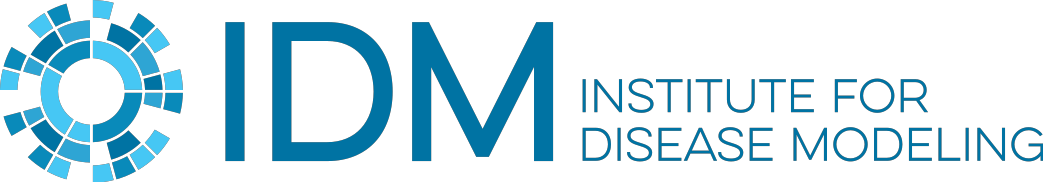

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG     1043    182 sRGB       TRUE         0 72x72  

In [17]:
# install.packages('magick')
# install.packages('rsvg')

library(magick)
library(rsvg)

logo_url <- 'https://comps.idmod.org/app/shell/img/logo/logo_IDM_horz1_RGB.svg'
logo_file <- 'logo_cairo.svg'
output_path <- '/work'

# convert original svg to local cairo svg
rsvg_svg(logo_url,paste(output_path,logo_file,sep='/'))

# import the converted svg
logo_svg <- image_read_svg(paste(output_path,logo_file,sep='/'))

View(logo_svg)

### Preparing the logo assembly

The SVG logo will be combined with a copyright clause into a third plot for assembly with patchwork. The exact dimensions of this plot aren't required to know because it will stretch to fill the required space (which happens to be the total width of the chartplot and textplot placed side-by-side). Unfortunately, imported graphics—such as the SVG logo—may also stretch to fill available space, so it is important to set coord_fixed(1) on this plot so the SVG will maintain its original aspect ratio. 

- To Do: This ggplot already applies a theme that prepares it for the final assembly. Remove these stylings to reveal the axes and gridlines so that the underlying construction is evident. How might the SVG logo be made a little bigger?

In [18]:
# NOTE: THIS BLOCK REQUIRES THE PREVIOUS CODE BLOCK TO BE RUN

# install.packages('showtext')
# install.packages('ggtext')

library(showtext)
library(ggtext)
library(ggplot2)

copyright <- '&copy; 2023 Bill & Melinda Gates Foundation. All rights reserved.'

# create a simple space to plot the copyright and logo
df <- data.frame(x=0:1,y=0:1)

# load the special fonts
font_add_google(name='Playfair Display', family='playfair') 

# give font rendering to showtext
showtext_auto(T)

# chart the copyright & logo
tailplot <- ggplot(df) +
  scale_x_continuous(
    expand=c(0,0), 
    limits=c(0,3)) +
  scale_y_continuous(
    expand=c(0,0), 
    limits=c(0,.1)) +
  coord_fixed(1) +
  geom_richtext(
    aes(x=0, y=.1/3, label=copyright, label.colour='transparent'), 
    hjust=0, 
    size=5,
    family='playfair',
    color='steelblue') +
  annotation_raster(
    logo_svg, 
    xmin=3-(5.699/10), 
    xmax=3, 
    ymin=0, 
    ymax=(1/10)
  ) +
  theme(
    plot.margin=margin(0,0,0,0,'lines'),
    plot.background=element_rect(fill='cornsilk', color='grey')
  )

# view the plot
# tailplot

# return font rendering to normal
showtext_auto(F)

![The chart + text assembly](/work/powerpoint_fig_04.png)

### Final Patchwork assembly

Combining the chartplot with the textplot and the tailplot is accomplished by describing a layout to Patchwork. In this case, the chart and text will share one row of an assembly and the copyright and logo comprise a row below that. At this point, it is important to use a device or ggsave to prescribe the resolution required so that the theme(s) can be fine tuned to the end result. 

- To Do: This code generates a plot with plot.background and border color set to something that provides visibility to the boundaries of each component. How might these be set to white (and/or transparent) without re-plotting each component? The next step shows how. 

In [ ]:
# NOTE: THIS BLOCK REQUIRES THE CODE ABOVE TO BE RUN

# install.packages('showtext')
# install.packages('ggtext')
# install.packages('patchwork')

library(showtext)
library(ggtext)
library(patchwork)
library(ggplot2)

heading <- 'The change of seasons is not date certain'

# load the special fonts
font_add_google(name='Playfair Display', family='playfair') 
font_add_google(name='IBM Plex Sans', family='plexsans',regular.wt=200)

# give font rendering to showtext
showtext_auto(T)

# prescribe the layout for the entire assembly
layout <- '
  112
  333
'

# plot everything together
combo <- chartplot + textplot + tailplot +
  plot_layout(widths = 1, heights = c(1,.1), design = layout)


# add the title and margins
assembly <- combo + 
  plot_annotation(
    title=heading,
    theme=theme(
      plot.title = element_markdown(family='playfair', size=40, color='steelblue'),
      plot.margin=margin(c(1,3,3,3), unit='lines'),
      plot.background=element_rect(fill='whitesmoke', color='transparent')
    )
  )

# view the plot
# assembly

# output to the intended resolution
ggsave(
  filename = 'assembly.png', 
  path = '/work/',
  plot = assembly,
  device = png, 
  bg = 'white',
  units = c('in'),
  width = 16,
  height = 9, 
  scale = 1, # +/- dimension
  dpi = 180 # +/- resolution
)


# return font rendering to normal
showtext_auto(F)

![The complete assembly](/work/powerpoint_fig_05.png)

### Finished plot at a sufficient resolution

The following code describes the final assembly. First, the combo plot—comprised of the three component plots—is rerun to apply a new theme that sets the plot.background fill and color to white and transparent. Since this theme is applied lastly, it will override the themes set on the individual components (fills and colors that helped to show each plot's boundary).  

Note that the ggsave parameters of width=16 and height=9 establish the intended aspect ratio of 16:9, which so happens to be the same as a conventional PowerPoint slide deck. The scale and dpi settings then conspire to size the plot at a particular resolution. With the value, scale=1, the fonts, points, and lines will plot relatively consistent with their intent, but as this value is adjusted, their dimensions will likely fluctuate depending on theme settings. For instance, setting scale to greater than 1 can be useful to "zoom" into charted points, making them appear larger or more prominent relative to the other aspects of the chart, but then it may be necessary to fine tune other elements (such as text) to counter the higher scale being imposed. 

- To Do: Adjust the values for scale and dpi to see what happens. PowerPoint slides can ultimately be displayed at a wide variety of sizes—even projected onto a large screen several feet wide—so, to guarantee there is always sufficient resolution, it's best if the plot placed into PowerPoint is oversized so that it must be scaled to 50% or less. This will provide detail necessary to render the slide to larger presentations. This code results in a 50% scale. How could it achieve 25%? 

In [ ]:
# NOTE: THIS BLOCK REQUIRES THE CODE ABOVE TO BE RUN

# install.packages('showtext')
# install.packages('ggtext')
# install.packages('patchwork')

library(showtext)
library(ggtext)
library(patchwork)
library(ggplot2)

heading <- 'The change of seasons is not date certain'

# patchwork again but with a theme to cancel the background coloring
combo <- chartplot + textplot + tailplot +
  plot_layout(widths = 1, heights = c(1,.1), design = layout) &
  theme(plot.background=element_rect(fill='white', color='transparent'))

# redo the title but with a theme to cancel the background coloring
slide <- combo + 
  plot_annotation(
    title=heading,
    theme=theme(
      plot.title = element_markdown(family='playfair', size=40, color='steelblue'),
      plot.margin=margin(c(40,60,40,60), unit='pt'),
      plot.background=element_rect(fill='white', color='transparent')
    )
  )

# view the plot
# slide

ggsave(
  filename = 'assembly.png', 
  path = '/work/',
  plot = slide,
  device = png, 
  bg = 'white',
  units = c('in'),
  width = 16,
  height = 9, 
  scale = 1, # +/- dimension
  dpi = 180 # +/- resolution
)

# 2880 x 1624 pixels
# The scale and dpi above combine to generate an image with the aspect ratio
# of a PowerPoint slide and sufficient resolution to be placed at 50% scale,
# resulting in crisp graphics during presentation at various dimensions 

![The finished plot](/work/powerpoint_fig_01.png)

# Additional resources

- The companion R script, github.com/ptrdo/hello-ggplot/layout/powerpoint.R

- Related notebooks.

- Additional information about fonts.

- Further explanation about resolution. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=82383a2c-6fa0-4827-a165-fc12a03e17b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>